<a href="https://colab.research.google.com/github/jonathanyepez/Starting-TF/blob/master/Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a test to see how GoogleColab works

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


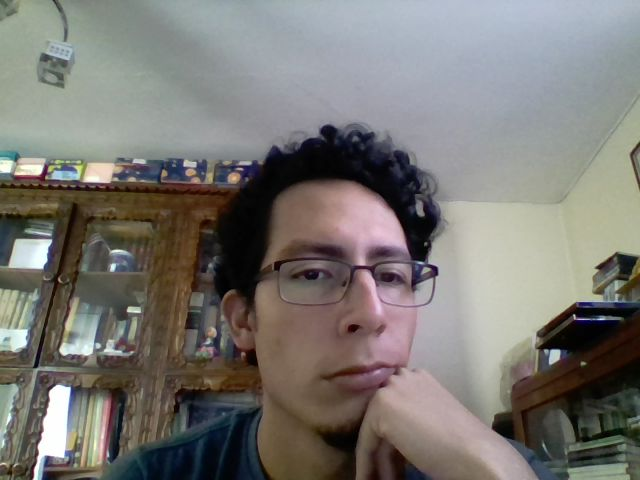

In [2]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [3]:
from vega_datasets import data
stocks = data.stocks()

import altair as alt
alt.Chart(stocks).mark_line().encode(
  x='date:T',
  y='price',
  color='symbol'
).interactive(bind_y=False)

Chart({
  data:     symbol       date   price
  0     MSFT 2000-01-01   39.81
  1     MSFT 2000-02-01   36.35
  2     MSFT 2000-03-01   43.22
  3     MSFT 2000-04-01   28.37
  4     MSFT 2000-05-01   25.45
  5     MSFT 2000-06-01   32.54
  6     MSFT 2000-07-01   28.40
  7     MSFT 2000-08-01   28.40
  8     MSFT 2000-09-01   24.53
  9     MSFT 2000-10-01   28.02
  10    MSFT 2000-11-01   23.34
  11    MSFT 2000-12-01   17.65
  12    MSFT 2001-01-01   24.84
  13    MSFT 2001-02-01   24.00
  14    MSFT 2001-03-01   22.25
  15    MSFT 2001-04-01   27.56
  16    MSFT 2001-05-01   28.14
  17    MSFT 2001-06-01   29.70
  18    MSFT 2001-07-01   26.93
  19    MSFT 2001-08-01   23.21
  20    MSFT 2001-09-01   20.82
  21    MSFT 2001-10-01   23.65
  22    MSFT 2001-11-01   26.12
  23    MSFT 2001-12-01   26.95
  24    MSFT 2002-01-01   25.92
  25    MSFT 2002-02-01   23.73
  26    MSFT 2002-03-01   24.53
  27    MSFT 2002-04-01   21.26
  28    MSFT 2002-05-01   20.71
  29    MSFT 2002-06-01   22.25
  ..     ...        ...     ...
  530   AAPL 2007-10-01  189.95
  531   AAPL 2007-11-01  182.22
  532   AAPL 2007-12-01  198.08
  533   AAPL 2008-01-01  135.36
  534   AAPL 2008-02-01  125.02
  535   AAPL 2008-03-01  143.50
  536   AAPL 2008-04-01  173.95
  537   AAPL 2008-05-01  188.75
  538   AAPL 2008-06-01  167.44
  539   AAPL 2008-07-01  158.95
  540   AAPL 2008-08-01  169.53
  541   AAPL 2008-09-01  113.66
  542   AAPL 2008-10-01  107.59
  543   AAPL 2008-11-01   92.67
  544   AAPL 2008-12-01   85.35
  545   AAPL 2009-01-01   90.13
  546   AAPL 2009-02-01   89.31
  547   AAPL 2009-03-01  105.12
  548   AAPL 2009-04-01  125.83
  549   AAPL 2009-05-01  135.81
  550   AAPL 2009-06-01  142.43
  551   AAPL 2009-07-01  163.39
  552   AAPL 2009-08-01  168.21
  553   AAPL 2009-09-01  185.35
  554   AAPL 2009-10-01  188.50
  555   AAPL 2009-11-01  199.91
  556   AAPL 2009-12-01  210.73
  557   AAPL 2010-01-01  192.06
  558   AAPL 2010-02-01  204.62
  559   AAPL 2010-03-01  223.02
  
  [560 rows x 3 columns],
  encoding: FacetedEncoding({
    color: Color({
      field: 'symbol',
      type: 'nominal'
    }),
    x: X({
      field: 'date',
      type: 'temporal'
    }),
    y: Y({
      field: 'price',
      type: 'quantitative'
    })
  }),
  mark: 'line',
  selection: {'selector001': SelectionDef({
    bind: 'scales',
    encodings: ['x'],
    type: 'interval'
  })}
})

In [4]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

interval = alt.selection_interval()

points = alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(cars).mark_bar().encode(
  x='count()',
  y='Origin',
  color='Origin'
).transform_filter(interval)

points & histogram

VConcatChart({
  data:      Acceleration  Cylinders  Displacement  ...  Origin  Weight_in_lbs       Year
  0            12.0          8         307.0  ...     USA           3504 1970-01-01
  1            11.5          8         350.0  ...     USA           3693 1970-01-01
  2            11.0          8         318.0  ...     USA           3436 1970-01-01
  3            12.0          8         304.0  ...     USA           3433 1970-01-01
  4            10.5          8         302.0  ...     USA           3449 1970-01-01
  5            10.0          8         429.0  ...     USA           4341 1970-01-01
  6             9.0          8         454.0  ...     USA           4354 1970-01-01
  7             8.5          8         440.0  ...     USA           4312 1970-01-01
  8            10.0          8         455.0  ...     USA           4425 1970-01-01
  9             8.5          8         390.0  ...     USA           3850 1970-01-01
  10           17.5          4         133.0  ...  Europe           3090 1970-01-01
  11           11.5          8         350.0  ...     USA           4142 1970-01-01
  12           11.0          8         351.0  ...     USA           4034 1970-01-01
  13           10.5          8         383.0  ...     USA           4166 1970-01-01
  14           11.0          8         360.0  ...     USA           3850 1970-01-01
  15           10.0          8         383.0  ...     USA           3563 1970-01-01
  16            8.0          8         340.0  ...     USA           3609 1970-01-01
  17            8.0          8         302.0  ...     USA           3353 1970-01-01
  18            9.5          8         400.0  ...     USA           3761 1970-01-01
  19           10.0          8         455.0  ...     USA           3086 1970-01-01
  20           15.0          4         113.0  ...   Japan           2372 1970-01-01
  21           15.5          6         198.0  ...     USA           2833 1970-01-01
  22           15.5          6         199.0  ...     USA           2774 1970-01-01
  23           16.0          6         200.0  ...     USA           2587 1970-01-01
  24           14.5          4          97.0  ...   Japan           2130 1970-01-01
  25           20.5          4          97.0  ...  Europe           1835 1970-01-01
  26           17.5          4         110.0  ...  Europe           2672 1970-01-01
  27           14.5          4         107.0  ...  Europe           2430 1970-01-01
  28           17.5          4         104.0  ...  Europe           2375 1970-01-01
  29           12.5          4         121.0  ...  Europe           2234 1970-01-01
  ..            ...        ...           ...  ...     ...            ...        ...
  376          18.6          4         112.0  ...     USA           2640 1982-01-01
  377          18.0          4         112.0  ...     USA           2395 1982-01-01
  378          16.2          4         112.0  ...     USA           2575 1982-01-01
  379          16.0          4         135.0  ...     USA           2525 1982-01-01
  380          18.0          4         151.0  ...     USA           2735 1982-01-01
  381          16.4          4         140.0  ...     USA           2865 1982-01-01
  382          20.5          4         151.0  ...     USA           3035 1982-01-01
  383          15.3          4         105.0  ...  Europe           1980 1982-01-01
  384          18.2          4          91.0  ...   Japan           2025 1982-01-01
  385          17.6          4          91.0  ...   Japan           1970 1982-01-01
  386          14.7          4         105.0  ...     USA           2125 1982-01-01
  387          17.3          4          98.0  ...     USA           2125 1982-01-01
  388          14.5          4         120.0  ...   Japan           2160 1982-01-01
  389          14.5          4         107.0  ...   Japan           2205 1982-01-01
  390          16.9          4         108.0  ...   Japan           2245 1982-01-01
  391          15.0          4 